## Import Library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

## Import Data

In [3]:
df = pd.read_csv('Hujan.csv')
df.head()

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu,hari hujan
0,2002,1,219.0,920.6,5.0,22.7,27.0
1,2002,2,563.8,922.8,6.0,22.9,22.0
2,2002,3,344.1,921.8,4.0,23.5,25.0
3,2002,4,183.1,921.4,4.0,23.7,20.0
4,2002,5,55.0,922.1,4.0,23.9,9.0


## Data Checking

In [4]:
df.isna().sum()

tahun              0
bulan              0
curah hujan        0
tekanan udara      0
kecepatan angin    0
suhu               0
hari hujan         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            264 non-null    int64  
 1   bulan            264 non-null    int64  
 2   curah hujan      264 non-null    float64
 3   tekanan udara    264 non-null    float64
 4   kecepatan angin  264 non-null    float64
 5   suhu             264 non-null    float64
 6   hari hujan       264 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 14.6 KB


In [6]:
miss_val = df.isna().sum()
duplicates = df.duplicated().sum()
miss_val, duplicates

(tahun              0
 bulan              0
 curah hujan        0
 tekanan udara      0
 kecepatan angin    0
 suhu               0
 hari hujan         0
 dtype: int64,
 0)

In [7]:
df['hari hujan'].value_counts()

hari hujan
23.00    25
25.00    18
20.00    17
26.00    17
27.00    13
21.00    13
24.00    12
18.00    11
22.00    11
16.00     9
4.00      9
15.00     9
9.00      8
28.00     7
29.00     7
8.00      7
17.00     7
19.00     6
7.00      6
10.00     6
12.00     5
11.00     5
1.00      5
3.00      5
13.00     4
30.00     4
5.00      4
14.00     3
0.00      2
31.00     2
2.00      2
6.00      2
0.46      1
0.96      1
1.08      1
Name: count, dtype: int64

In [8]:
delete_val = [0.46, 0.96, 1.08]

df = df[~df['hari hujan'].isin(delete_val)]

# Data Visualization

### Visualization Based on Months and mean every features

In [9]:
rata2_bulan = df.groupby('bulan', as_index=False)[['curah hujan', 'suhu', 'tekanan udara', 'kecepatan angin', 'hari hujan']].mean()
rata2_bulan

,bulan,curah hujan,suhu,tekanan udara,kecepatan angin,hari hujan
0,1,174.945455,23.640909,922.477273,4.927273,22.909091
1,2,239.322727,23.409091,922.650000,4.663636,23.000000
2,3,261.009091,23.722727,922.686364,4.254545,24.500000
3,4,253.554545,23.863636,922.686364,3.681818,23.363636
4,5,200.518182,23.945455,922.840909,3.609091,19.454545
5,6,97.986364,23.490909,923.077273,3.550000,14.636364
6,7,58.086364,23.195455,923.322727,3.731818,10.363636
7,8,43.454545,23.522727,923.404545,3.686364,7.318182
8,9,78.595455,24.013636,923.663636,4.031818,10.318182
9,10,147.838095,24.176190,923.366667,4.014286,16.904762


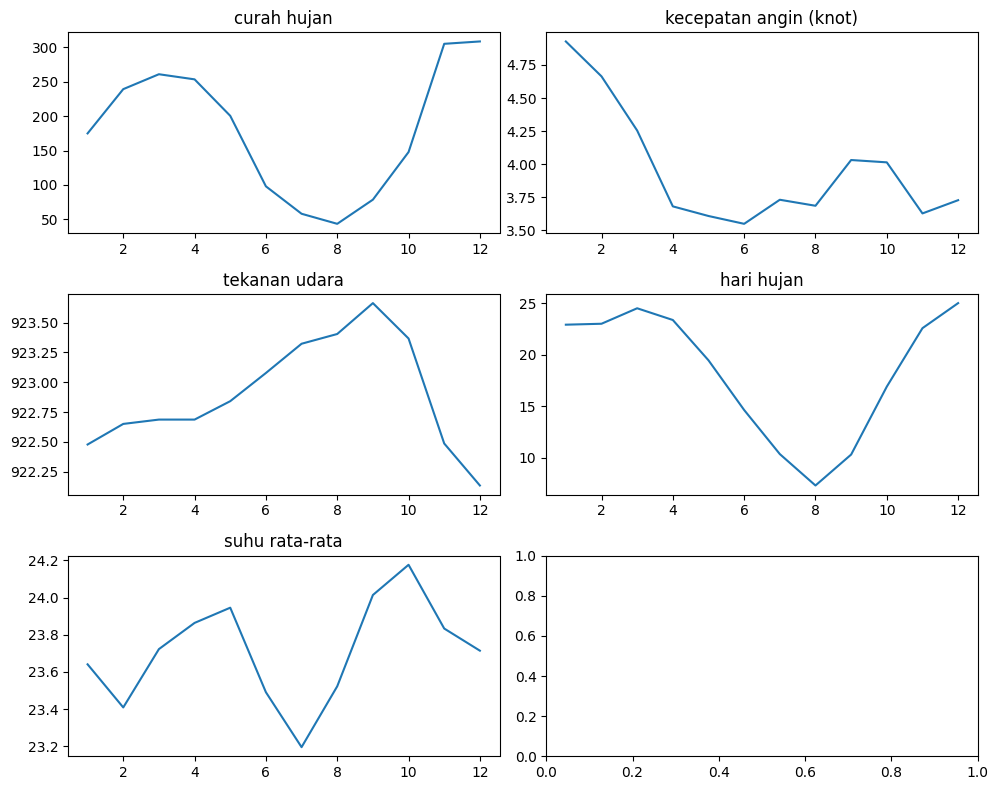

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].plot(rata2_bulan['bulan'], rata2_bulan['curah hujan'])
axs[0, 0].set_title("curah hujan")
axs[1, 0].plot(rata2_bulan['bulan'], rata2_bulan['tekanan udara'])
axs[1, 0].set_title("tekanan udara")
axs[0, 1].plot(rata2_bulan['bulan'], rata2_bulan['kecepatan angin'])
axs[0, 1].set_title("kecepatan angin (knot)")
axs[1, 1].plot(rata2_bulan['bulan'], rata2_bulan['hari hujan'])
axs[1, 1].set_title("hari hujan")
axs[2, 0].plot(rata2_bulan['bulan'], rata2_bulan['suhu'])
axs[2, 0].set_title("suhu rata-rata")
fig.tight_layout()

### Visualization Based on Years and mean every features

In [11]:
rata2_tahun = df.groupby('tahun', as_index=False)[['curah hujan', 'suhu', 'tekanan udara', 'kecepatan angin', 'hari hujan']].mean()
rata2_tahun

,tahun,curah hujan,suhu,tekanan udara,kecepatan angin,hari hujan
0,2002,188.633333,23.558333,922.316667,4.833333,14.666667
1,2003,18.833333,23.616667,922.291667,4.500000,16.083333
2,2004,161.033333,23.533333,922.275000,4.333333,20.000000
3,2005,190.241667,23.408333,922.225000,4.166667,15.416667
4,2006,144.366667,23.466667,922.325000,4.916667,17.166667
5,2007,187.958333,23.516667,922.133333,3.083333,16.750000
6,2008,166.750000,23.141667,922.541667,3.083333,16.833333
7,2009,174.800000,23.366667,922.925000,3.166667,16.833333
8,2010,322.366667,23.308333,922.383333,3.000000,23.750000
9,2011,149.058333,23.375000,922.100000,3.250000,17.916667


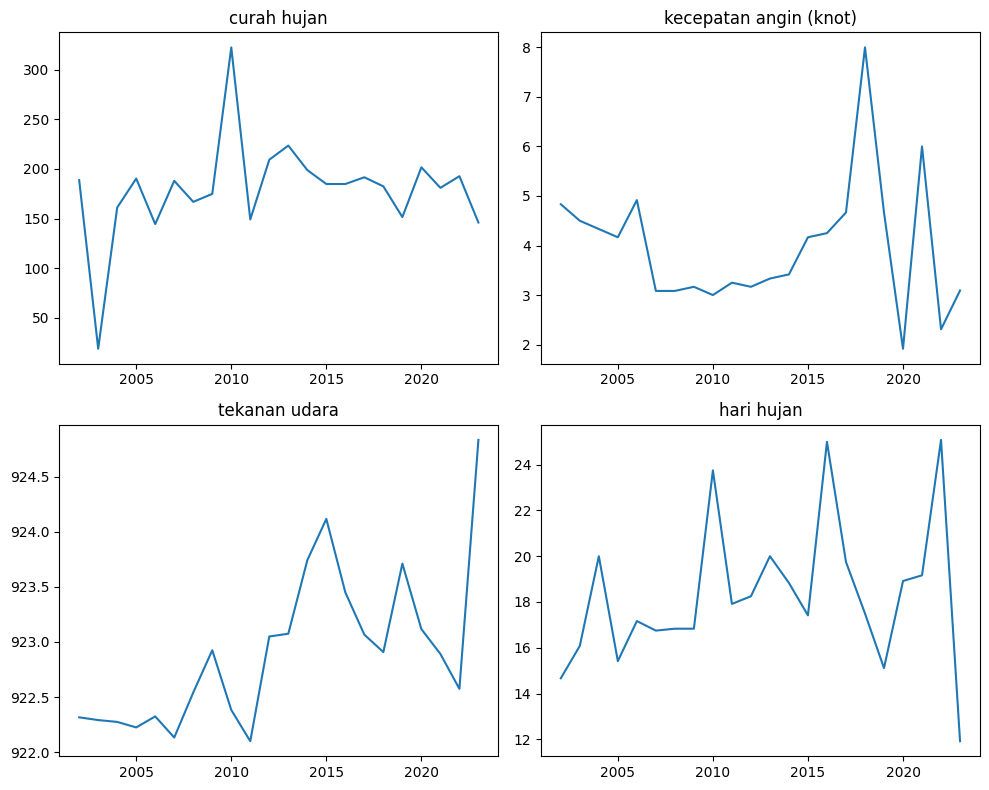

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(rata2_tahun['tahun'], rata2_tahun['curah hujan'])
axs[0, 0].set_title("curah hujan")
axs[1, 0].plot(rata2_tahun['tahun'], rata2_tahun['tekanan udara'])
axs[1, 0].set_title("tekanan udara")
axs[0, 1].plot(rata2_tahun['tahun'], rata2_tahun['kecepatan angin'])
axs[0, 1].set_title("kecepatan angin (knot)")
axs[1, 1].plot(rata2_tahun['tahun'], rata2_tahun['hari hujan'])
axs[1, 1].set_title("hari hujan")

fig.tight_layout()

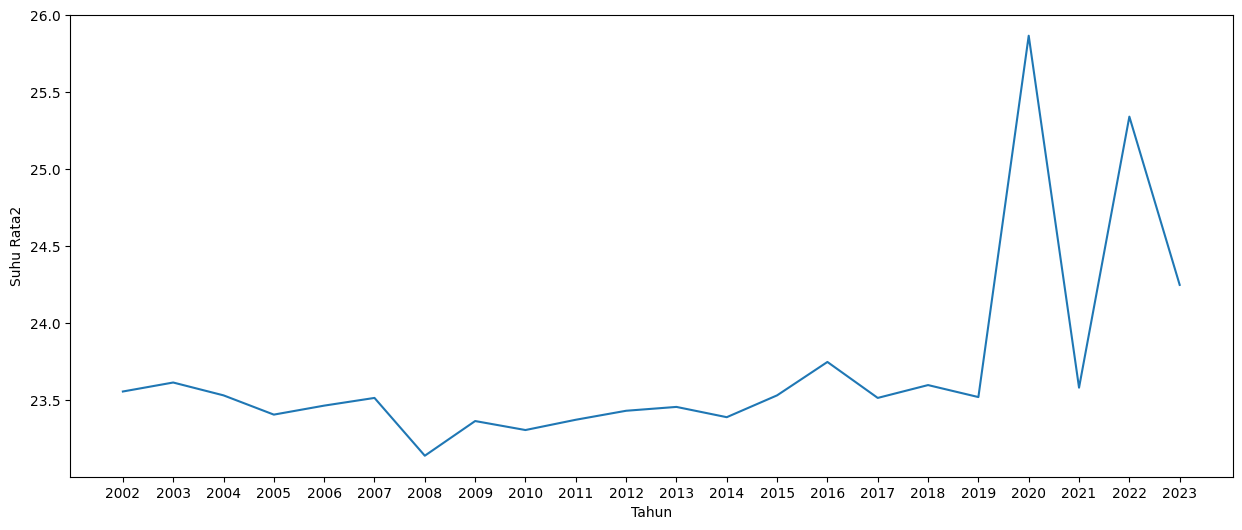

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(rata2_tahun['tahun'], rata2_tahun['suhu'])
ax.set_xlabel('Tahun')
ax.set_ylabel('Suhu Rata2')
plt.xticks(rata2_tahun['tahun'])
plt.show()

### Heatmap

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada DataFrame
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalized_df.head()

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu,hari hujan
0,0.0,0.000000,0.343799,0.107692,0.4,0.086957,0.870968
1,0.0,0.090909,0.885086,0.446154,0.5,0.130435,0.709677
2,0.0,0.181818,0.540188,0.292308,0.3,0.260870,0.806452
3,0.0,0.272727,0.287441,0.230769,0.3,0.304348,0.645161
4,0.0,0.363636,0.086342,0.338462,0.3,0.347826,0.290323


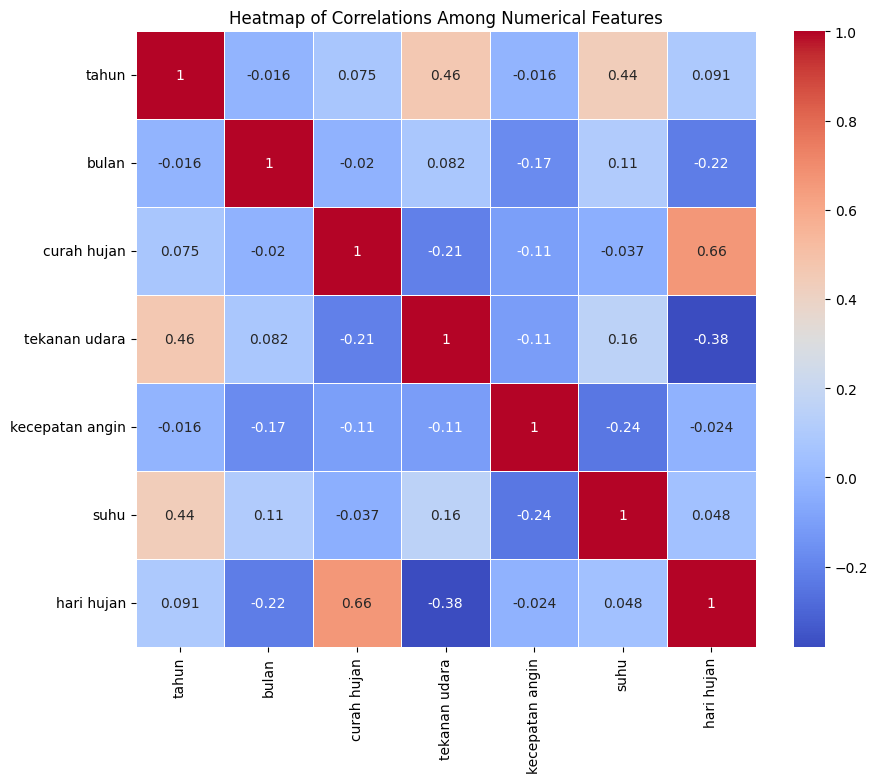

In [15]:
correlation_matrix = normalized_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

## Visualize every features with boxplot

<Axes: xlabel='hari hujan'>

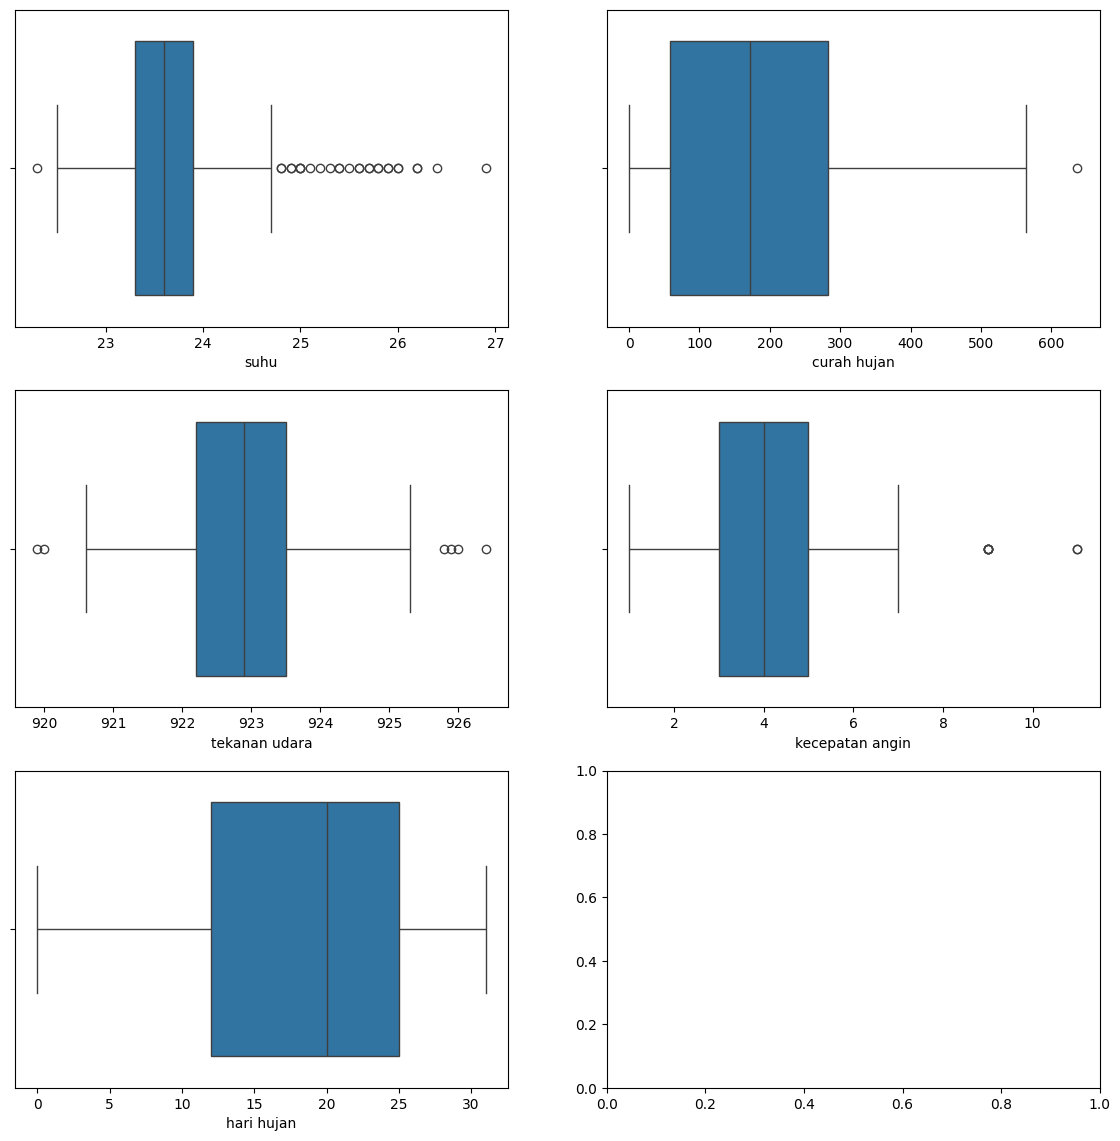

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(14,14))
sns.boxplot(x=df["suhu"], ax=axs[0,0])
sns.boxplot(x=df["curah hujan"], ax=axs[0,1])
sns.boxplot(x=df["tekanan udara"], ax=axs[1,0])
sns.boxplot(x=df["kecepatan angin"], ax=axs[1,1])
sns.boxplot(x=df["hari hujan"], ax=axs[2,0])

### Discard some outliers

In [17]:
df.loc[(df['tekanan udara'] < 920.5), 'tekanan udara'] = 920.5
df.loc[(df['kecepatan angin'] > 7), 'kecepatan angin'] = 7
df.loc[(df['tekanan udara'] > 925.5), 'tekanan udara'] = 925.5
df.loc[(df['curah hujan'] > 590), 'curah hujan'] = 590

<Axes: xlabel='hari hujan'>

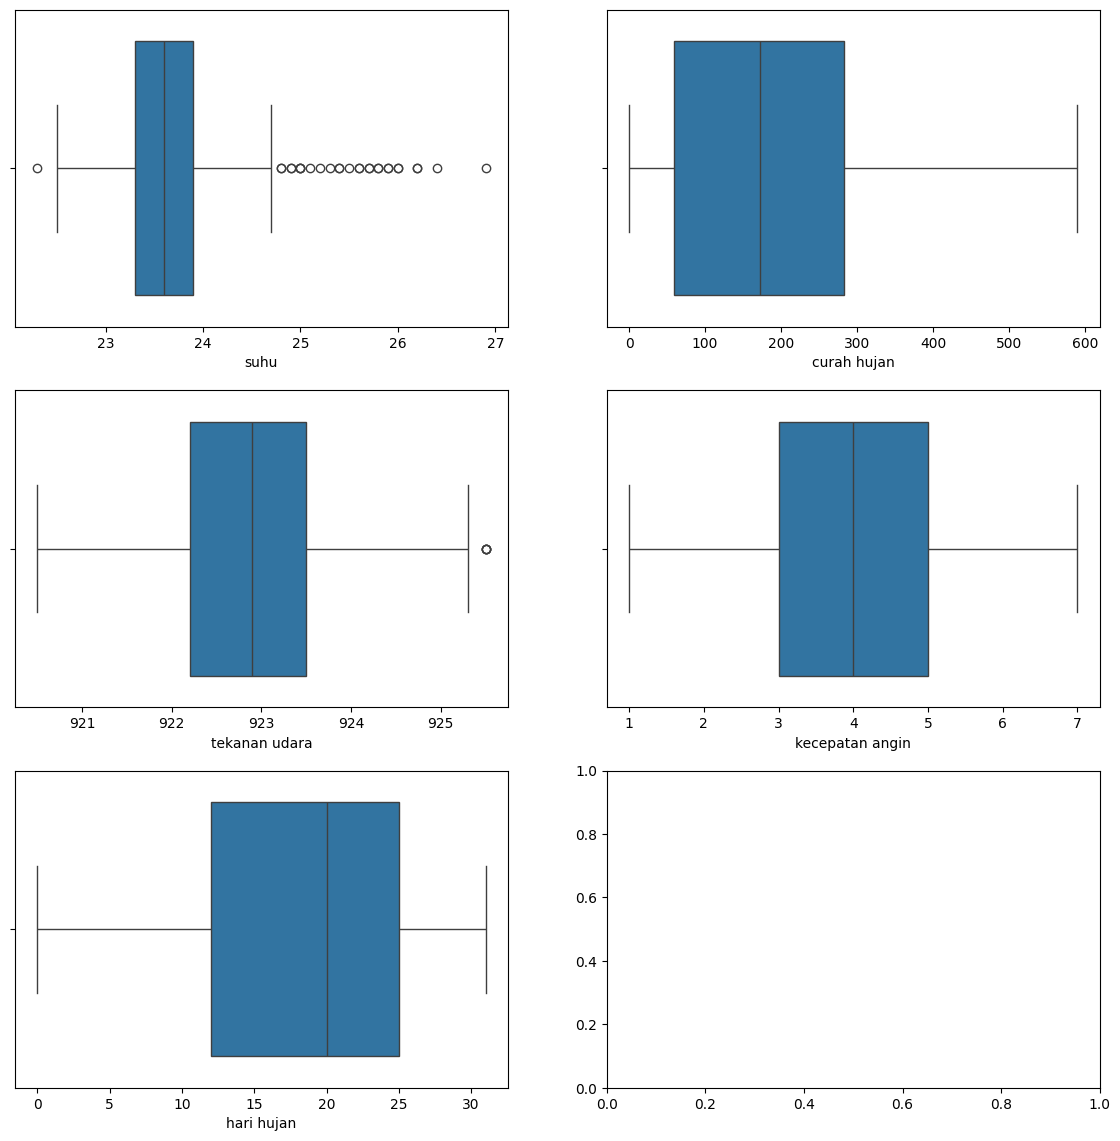

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(14,14))
sns.boxplot(x=df["suhu"], ax=axs[0,0])
sns.boxplot(x=df["curah hujan"], ax=axs[0,1])
sns.boxplot(x=df["tekanan udara"], ax=axs[1,0])
sns.boxplot(x=df["kecepatan angin"], ax=axs[1,1])
sns.boxplot(x=df["hari hujan"], ax=axs[2,0])

### Add intensitas column and make as the target

In [19]:
val_range = [-1, 10, 20, 33]
intensitas = ['rendah', 'sedang', 'tinggi']

df['intensitas'] = pd.cut(df['hari hujan'], bins=val_range, labels=intensitas)
df = df.drop(columns='hari hujan')
df.head()\
  

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu,intensitas
0,2002,1,219.0,920.6,5.0,22.7,tinggi
1,2002,2,563.8,922.8,6.0,22.9,tinggi
2,2002,3,344.1,921.8,4.0,23.5,tinggi
3,2002,4,183.1,921.4,4.0,23.7,sedang
4,2002,5,55.0,922.1,4.0,23.9,rendah


## Handle unbalanced data with undersampling

In [20]:
# ting, sed, ren = df['intensitas'].value_counts()

# tinggi = df[df['intensitas'] == 'tinggi']
# sedang = df[df['intensitas'] == 'sedang']
# rendah = df[df['intensitas'] == 'rendah']

# down_tinggi = tinggi.sample(n=len(rendah), replace=True, random_state=42)
# down_sedang = sedang.sample(n=len(rendah), replace=True, random_state=42)

# # down_sedang.shape, down_tinggi.shape, rendah.shape
# down_sedang.head(), down_sedang.shape

## Handle unbalanced data with oversampling

### Split data

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x = df.drop(columns=['intensitas'])
y = df.intensitas

x, y = ros.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((309, 6), (78, 6), (309,), (78,))

## Train the model

In [22]:
from sklearn.model_selection import GridSearchCV

num_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures())
])

preprosessor = ColumnTransformer([
    ('numeric', num_pipe, ['curah hujan', 'tekanan udara', 'kecepatan angin',
       'suhu', 'bulan']),
])


from sklearn.neighbors import KNeighborsClassifier
model = Pipeline([
    ('prep', preprosessor),
    ('algo', KNeighborsClassifier())
])

parameter = {
    'prep__numeric__poly__degree': [1, 2, 3],
    'prep__numeric__poly__interaction_only': [True, False]
}

model = GridSearchCV(model, parameter, n_jobs=-1, cv=2, verbose=1)
model.fit(x_train, y_train)
print(model.best_params_)
print(model.score(x_train,y_train), model.best_score_, model.score(x_test,y_test))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
{'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
0.7540453074433657 0.6666736489317134 0.7307692307692307


## Feature importance

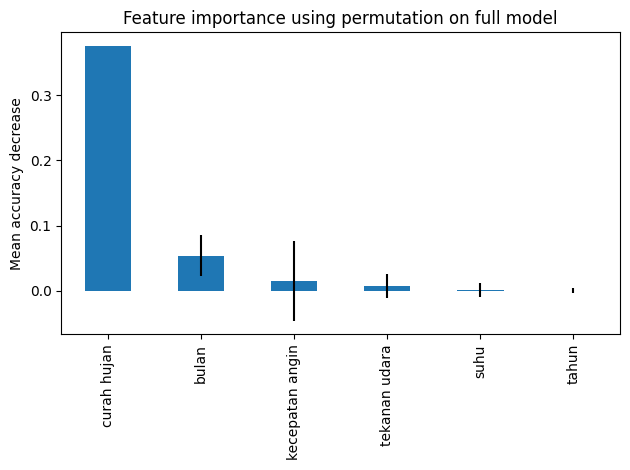

In [23]:
result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

data_importance = pd.Series(result.importances_mean, index=['tahun', 'bulan', 'curah hujan', 'tekanan udara', 'kecepatan angin',
       'suhu'])

fig, ax = plt.subplots()
data_importance.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importance using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

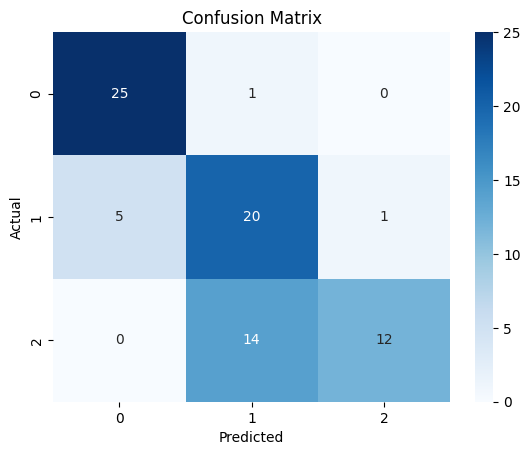

In [25]:
rf_predictions = model.predict(x_test)

cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the Model

In [23]:
import pickle, os

os.makedirs("Models", exist_ok=True)

filename = "Models/Hujan_KNN.pkl"
pickle.dump(model.best_estimator_, open(filename, "wb"))

## Load the Model

In [24]:
loaded_model = pickle.load(open("Models/Hujan_KNN.pkl", 'rb'))

## Predict the Model

In [25]:
x_train.iloc[:3]

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu
198,2018,7,0.3,923.1,7.0,22.9
156,2015,1,188.0,924.0,4.0,23.2
375,2023,3,200.0,924.3,2.9,23.7


In [26]:
X_pred = pd.DataFrame([[2024, 5, 190, 923.8, 3, 24.5]], columns=x_train.columns)
X_pred

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu
0,2024,5,190,923.8,3,24.5


In [27]:
loaded_model.predict(X_pred)

array(['sedang'], dtype=object)